<a href="https://colab.research.google.com/github/ROLIVEIRABI/Data_Science/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Análise dos Dados do Airbnb - Barcelona e Madri

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes às cidades de Barcelona e Madri, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas os seguintess arquivos:

* `listings_madri.csv e listings_barcelona.csv` - *Dados referentes a Barcelona e Madri.*



In [0]:
# importar os pacotes necessarios para manipulação dos dados. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

%matplotlib inline


In [0]:
# importar o arquivo listings.csv para um DataFrame
df_barc  = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2019-11-09/visualisations/listings.csv")
df_madri = pd.read_csv("http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2019-11-09/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.
Antes de iniciar qualquer análise, vamos verificar a cara dos nossos *datasets*, analisando as 5 primeiras entradas.

In [8]:
# mostrar as 5 primeiras entradas
df_barc.head()
df_madri.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,68,2019-10-10,0.58,2,89
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.53,2,99
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,60,30,0,NaN,NaN,5,312
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,5,2019-10-29,0.08,1,361
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,65,2019-10-14,0.63,1,322


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos verificar quantas entradas (linhas e colunas) os datasets possuem.

No site do Airbnb tem a versão completa desse arquivo(listings.csv.gz), ire trabalhar com uma versão mais compacta.

In [18]:
# identificar o volume de dados do DataFrame de Barcelona
print (f"Temos para Barcelona {df_barc.shape[0]} linhas e {df_barc.shape[1]} colunas")


Temos para Barcelona 20428 linhas e 16 colunas


In [19]:
# identificar o volume de dados do DataFrame de Madri

print(f" Temos para Madri {df_madri.shape[0]} linhas e {df_madri.shape[1]} colunas")

 Temos para Madri 20539 linhas e 16 colunas


In [20]:
# verificar a tipagem dos dados de Barcelona
display(df_barc.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [21]:
# verificar a tipagem dos dados de Madri

display(df_madri.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no inicio se esses valores nulos são significativos comparados ao total de entradas.

In [24]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

# Valores nulos do dataset de Barcelona.

nulos_barc = df_barc.isnull().sum()
print(nulos_barc)


id                                   0
name                                15
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4276
reviews_per_month                 4276
calculated_host_listings_count       0
availability_365                     0
dtype: int64


In [26]:
# Valores nulos do dataset de Madri.

nulos_madri = df_madri.isnull().sum()
print(nulos_madri)

id                                   0
name                                 4
host_id                              0
host_name                           12
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3907
reviews_per_month                 3907
calculated_host_listings_count       0
availability_365                     0
dtype: int64


In [27]:
# Criando variaveis de linhas totais dos datasets

linhas_barc = df_barc.shape[0]
linhas_madri = df_madri.shape[0]
print(f" Existem {linhas_barc} linhas no dataset de Barcelona e {linhas_madri} linhas no dataset de Madri")

 Existem 20428 linhas no dataset de Barcelona e 20539 linhas no dataset de Madri


In [35]:
# Vendo esses números em % Barcelona

perc_barc = (nulos_barc / linhas_barc).sort_values(ascending=False)
perc_madri = (nulos_madri / linhas_madri).sort_values(ascending = False)
print('Os percentuais para cidade de Barcelona são:')
print("=-="*15)
print(perc_barc)
print("=-="*50)
print("---"*50)
print("=-="*50)
print('Os percentuais para cidade de Madri são:')
print("=-="*15)
print(perc_madri)


Os percentuais para cidade de Barcelona são:
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
reviews_per_month                 0.209321
last_review                       0.209321
host_name                         0.000832
name                              0.000734
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
-------------------------------------------------------

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos aproximadamente em 20% para os dois datasets.

* Para as outras variáveis não encontrei valores nulos significativos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Irei plotar o histograma para identificar a distribuição das variáveis.

Histograma de Barcelona

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd17f14c400>,
      dtype=object)

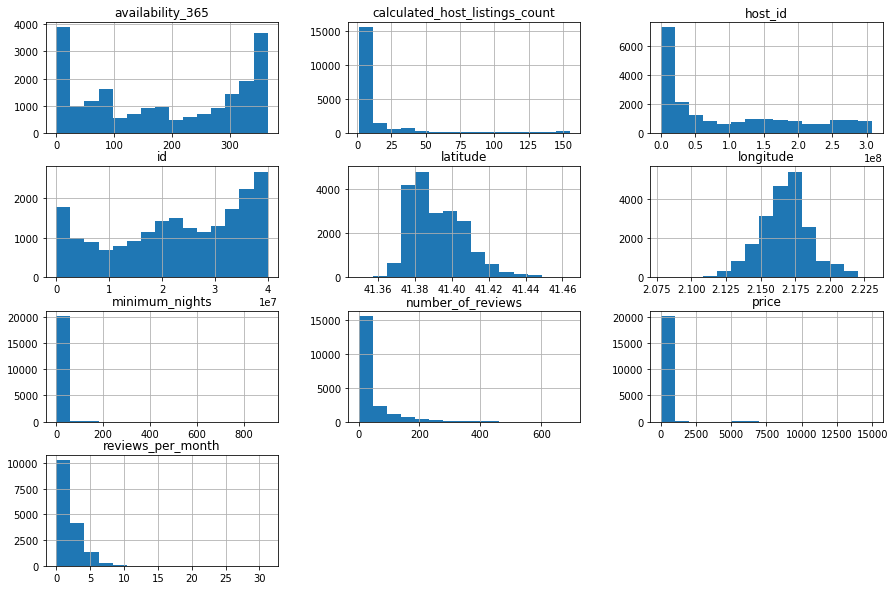

In [37]:
# plotar o histograma das variáveis numéricas
df_barc.hist(bins = 15, figsize = (15 , 10))


Agora veremos o histograma de Madri

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd17d133710>,
      dtype=object)

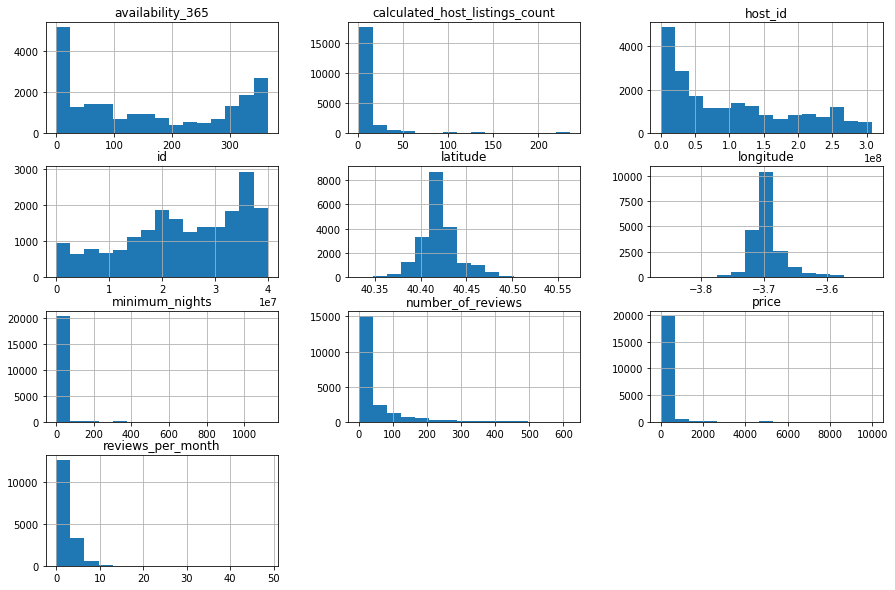

In [38]:
df_madri.hist(bins = 15, figsize = (15 , 10))

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

Resumo estatístico por meio do método describe()
Plotar boxplots para a variável.

 **Metodo Describle para Barcelona**

In [40]:
# Describle Barcelona
df_barc[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20428.000000,20428.000000,20428.00000,16152.000000,20428.000000,20428.000000
mean,134.587429,8.736244,36.27335,1.861225,14.716370,183.984286
std,478.968270,18.702046,62.75757,1.766933,30.366928,134.907793
min,0.000000,1.000000,0.00000,0.010000,1.000000,0.000000
25%,39.000000,1.000000,1.00000,0.440000,1.000000,54.000000
50%,60.000000,2.000000,9.00000,1.320000,2.000000,179.000000
75%,105.000000,4.000000,43.00000,2.860000,11.000000,323.000000
max,15000.000000,900.000000,694.00000,31.210000,155.000000,365.000000


**Dados de Barcelona**

Analisando preço, verificamos que um possivel outlier está influênciando o valor da média.

A média de 134,58 é maior do que o terceiro percentil onde 75% da base de dados tem o valor abaixo de 105 e 50% dos dados tem o valor menor ou igual a 60. 
O valor maximo de 15000 está influênciando uma distribuição homogênea dos dados.

A quantidade minima de noites está acima do real de 365 dias no ano. 


**Describle para Madri**

In [41]:
df_madri[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20539.000000,20539.000000,20539.000000,16632.000000,20539.000000,20539.000000
mean,136.968402,4.407177,37.799747,2.070853,11.129023,157.990311
std,395.092799,20.983241,64.515471,2.045338,30.184278,134.846613
min,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.000000,1.000000,1.000000,0.470000,1.000000,24.000000
50%,65.000000,2.000000,10.000000,1.420000,2.000000,130.000000
75%,101.000000,3.000000,46.000000,3.120000,7.000000,309.000000
max,9999.000000,1125.000000,619.000000,48.600000,235.000000,365.000000


**Analisando dados de Madri**
Analisando preço, verificamos que um possivel outlier está influênciando o valor da média.

A média de 136,96 é maior do que o terceiro percentil onde 75% da base de dados tem o valor abaixo de 101 e bem maior do que os 50% dos valores de  dados que  tem o valor menor ou igual a 65. 


O valor maximo de 9999 está influênciando uma distribuição homogênea dos dados.

A quantidade minima de noites está acima do real de 365 dias no ano.

.





Bloxpot para a variavel Minimum_nights

**BARCELONA**

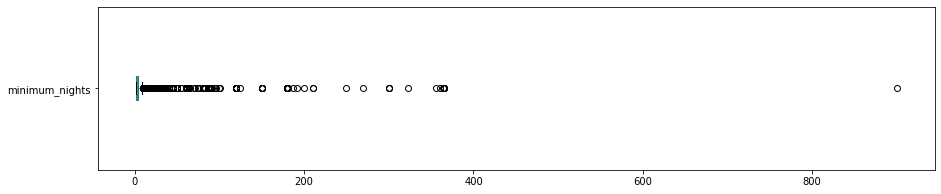

minimum_nights: valores acima de 60:
199 entradas
0.9742%


In [43]:
# minimum_nights
df_barc.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 60:")
print("{} entradas".format(len(df_barc[df_barc.minimum_nights > 60])))
print("{:.4f}%".format((len(df_barc[df_barc.minimum_nights > 60]) / df_barc.shape[0])*100))

**MADRI**

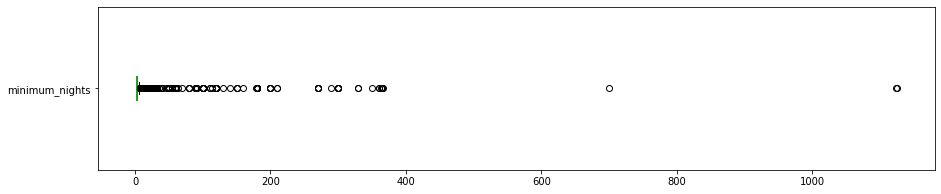

minimum_nights: valores acima de 65:
150 entradas
0.7303%


In [44]:
# minimum_nights
df_madri.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 65:")
print("{} entradas".format(len(df_madri[df_madri.minimum_nights > 60])))
print("{:.4f}%".format((len(df_madri[df_madri.minimum_nights > 60]) / df_madri.shape[0])*100))

**BOXPLO DE PREÇO(PRICE).**

 Para Barcelona temos a seguinte distribuição de preço 
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=


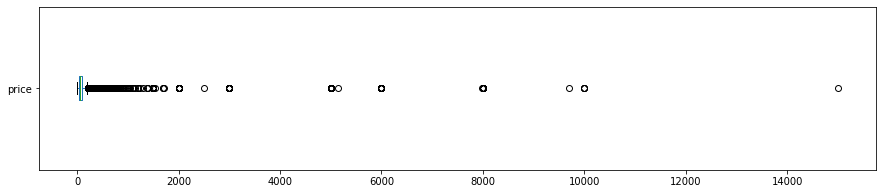


price: valores acima de 1500
152 entradas
0.7441%
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
 Para Madri temos a seguinte distribuição de preço 
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=


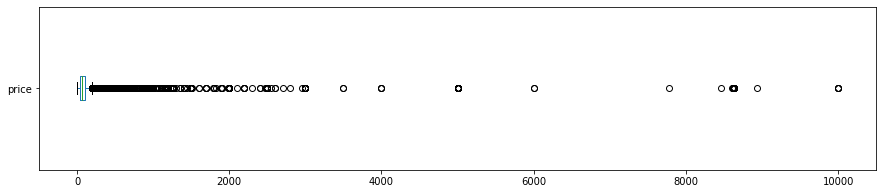


price: valores acima de 1500
5121 entradas
24.9331%
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=


In [48]:
# price
print(" Para Barcelona temos a seguinte distribuição de preço ")
print("=-="*50)
df_barc.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df_barc[df_barc.price > 1500])))
print("{:.4f}%".format((len(df_barc[df_barc.price > 1500]) / df_barc.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

print("=-="*50)
print("=-="*50)
print("=-="*50)

print(" Para Madri temos a seguinte distribuição de preço ")
print("=-="*50)
df_madri.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df_madri[df_madri.price > 1500])))
print("{:.4f}%".format((len(df_madri[df_madri.price > 1500]) / df_madri.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

print("=-="*50)
print("=-="*50)
print("=-="*50)




**Retirando Outliers da base de dados**

Visto que identificamos alguns outliers na base de dados irei limpar esses dados e gerar novos histogramas.



Base de dados de Barcelona
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=


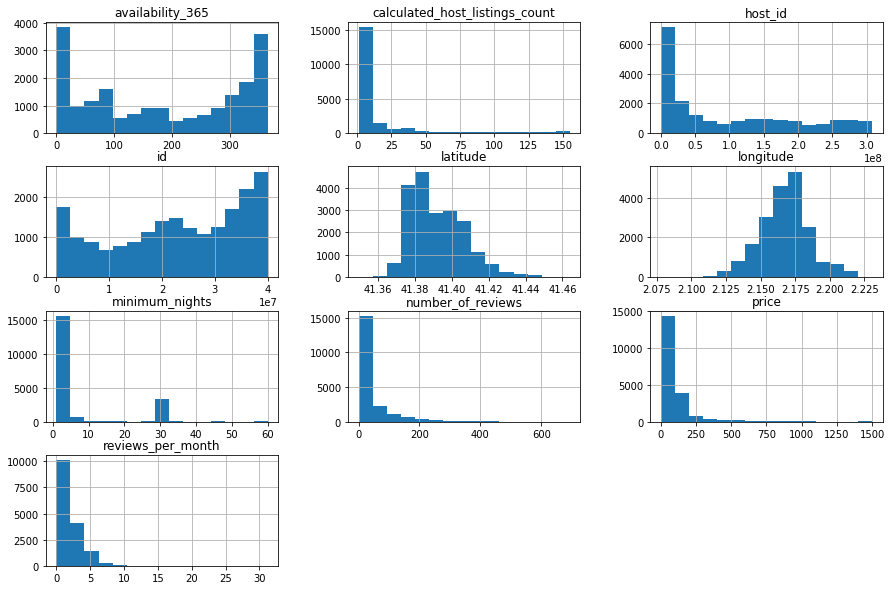

In [52]:
# remover os *outliers* em um novo DataFrame
print("Base de dados de Barcelona")

df_cleanb = df_barc.copy()

df_cleanb.drop(df_cleanb[df_cleanb.price > 1500].index, axis=0, inplace=True)
df_cleanb.drop(df_cleanb[df_cleanb.minimum_nights > 60].index, axis=0, inplace=True)

# remover variáveis caso esteja com campo vazio.
#df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_cleanb.hist(bins=15, figsize=(15,10));

print("=-="*50)
print("=-="*50)
print("=-="*50)





Base de dados de Madri


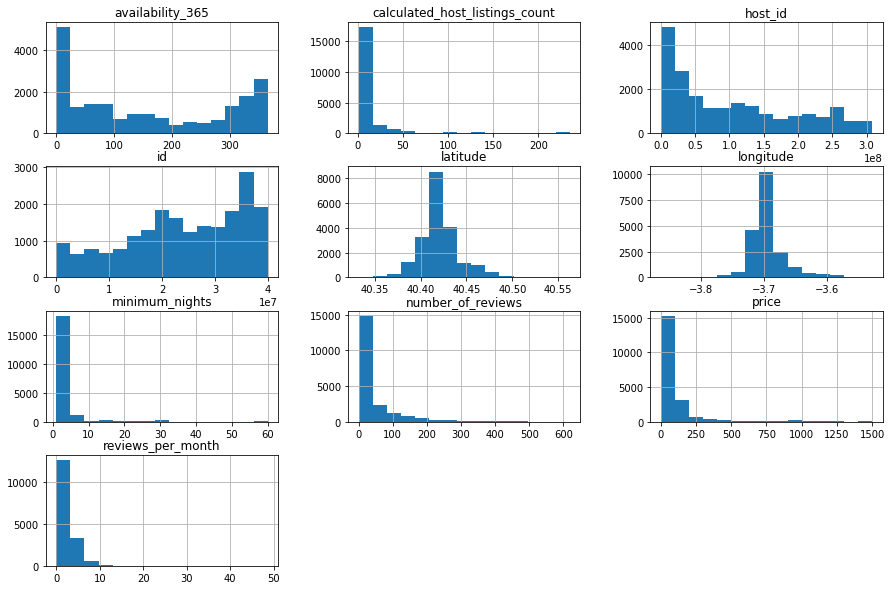

In [53]:
print("Base de dados de Madri")

df_cleanm = df_madri.copy()

df_cleanm.drop(df_cleanm[df_cleanm.price > 1500].index, axis=0, inplace=True)
df_cleanm.drop(df_cleanm[df_cleanm.minimum_nights > 60].index, axis=0, inplace=True)

# remover variáveis caso esteja com campo vazio.
#df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_cleanm.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [74]:
# ver a média da coluna `price``

print(f"A média de preço para Barcelona é: {df_cleanb.price.mean()} ")

print(f"A média de preço para Madri é: {df_cleanm.price.mean()} ")



A média de preço para Barcelona é: 97.72600488120734 
A média de preço para Madri é: 114.13668212770158 


### **Q4. Qual a correlação existente entre as variáveis**



Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

**BARCELONA**

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.100523,-0.017302,-0.075095,0.194598,0.190918
minimum_nights,-0.100523,1.000000,-0.231097,-0.302441,0.133306,0.123719
number_of_reviews,-0.017302,-0.231097,1.000000,0.500370,-0.116435,0.061252
reviews_per_month,-0.075095,-0.302441,0.500370,1.000000,-0.163716,-0.018751
calculated_host_listings_count,0.194598,0.133306,-0.116435,-0.163716,1.000000,0.207849
availability_365,0.190918,0.123719,0.061252,-0.018751,0.207849,1.000000


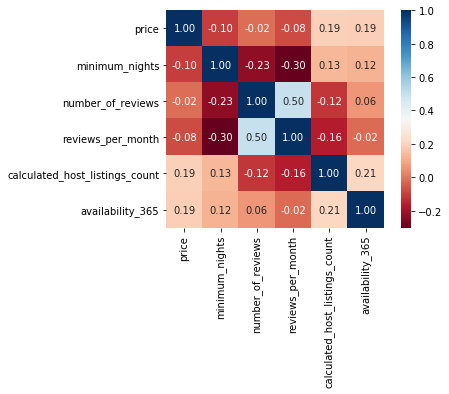

In [76]:
# criar uma matriz de correlação
corrb = df_cleanb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corrb)

# plotar um heatmap a partir das correlações

sns.heatmap(corrb, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


**MADRI**

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.051457,-0.134043,-0.087314,0.155883,0.088422
minimum_nights,-0.051457,1.000000,-0.086061,-0.160866,-0.007855,0.020035
number_of_reviews,-0.134043,-0.086061,1.000000,0.616694,-0.066832,0.064547
reviews_per_month,-0.087314,-0.160866,0.616694,1.000000,-0.109337,0.029843
calculated_host_listings_count,0.155883,-0.007855,-0.066832,-0.109337,1.000000,0.180647
availability_365,0.088422,0.020035,0.064547,0.029843,0.180647,1.000000


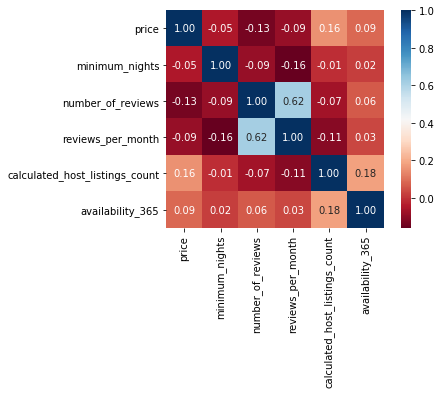

In [78]:
# plotar um heatmap a partir das correlações
# criar uma matriz de correlação
corrm = df_cleanm[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corrm)

# plotar um heatmap a partir das correlações

sns.heatmap(corrm, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);



### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [81]:
# mostrar a quantidade de cada tipo de imóvel disponível

print("Para a cidade de Barcelona a distribuição de quartos alugados fica:")
print(df_cleanb.room_type.value_counts())
print("-=-"*50)
print("Para a cidade de Madri a distribuição de quartos alugados fica:")
print(df_cleanm.room_type.value_counts())

Para a cidade de Barcelona a distribuição de quartos alugados fica:
Private room       10320
Entire home/apt     9028
Hotel room           573
Shared room          156
Name: room_type, dtype: int64
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Para a cidade de Madri a distribuição de quartos alugados fica:
Entire home/apt    12471
Private room        7165
Hotel room           385
Shared room          245
Name: room_type, dtype: int64


In [84]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print("Os percentuais dos tipos de quartos em Barcelona são:")
print(df_cleanb.room_type.value_counts() / df_cleanb.shape[0]*100)
print("-=-"*50)
print("Os percentuais dos tipos de quartos em Madri são:")
print(df_cleanm.room_type.value_counts() / df_cleanm.shape[0]*100)



Os percentuais dos tipos de quartos em Barcelona são:
Private room       51.402102
Entire home/apt    44.966878
Hotel room          2.854012
Shared room         0.777009
Name: room_type, dtype: float64
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Os percentuais dos tipos de quartos em Madri são:
Entire home/apt    61.536564
Private room       35.354781
Hotel room          1.899734
Shared room         1.208921
Name: room_type, dtype: float64


### **Q6. Qual a localidade mais cara de Barcelona e Madri?**
ma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [87]:
# ver preços por bairros, na média
print("Os quartos mais caros em Barcelona são:")
print(df_cleanb.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])
print("-=-"*50)
print("Os quartos mais caros em Madri são:")
print(df_cleanm.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])


Os quartos mais caros em Barcelona são:
neighbourhood
Diagonal Mar i el Front Marítim del Poblenou    197.370558
la Vila Olímpica del Poblenou                   178.478261
la Dreta de l'Eixample                          165.356031
les Tres Torres                                 154.727273
el Camp de l'Arpa del Clot                      123.705056
Vallvidrera, el Tibidabo i les Planes           120.114286
la Vila de Gràcia                               117.997268
el Putxet i el Farró                            112.111607
l'Antiga Esquerra de l'Eixample                 109.518130
el Poblenou                                     104.941545
Name: price, dtype: float64
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Os quartos mais caros em Madri são:
neighbourhood
Zofío           533.936170
Hellín          379.870968
Rosas           327.647619
Arcos           313.425532
Canillejas      290

**BARCELONA**

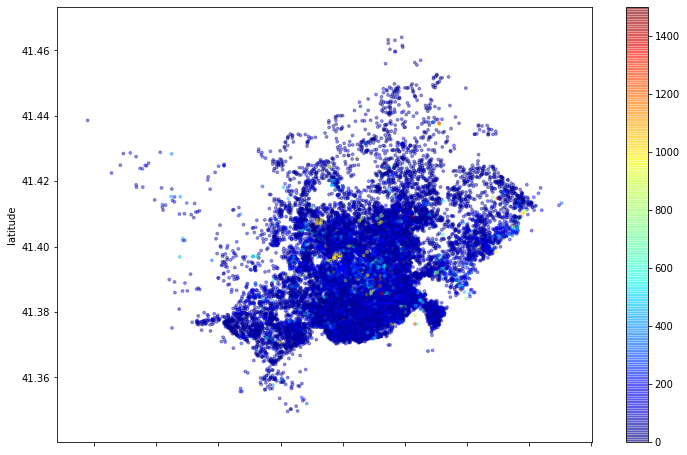

In [89]:
# plotar os imóveis pela latitude-longitude

df_cleanb.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_cleanb['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


**MADRI**

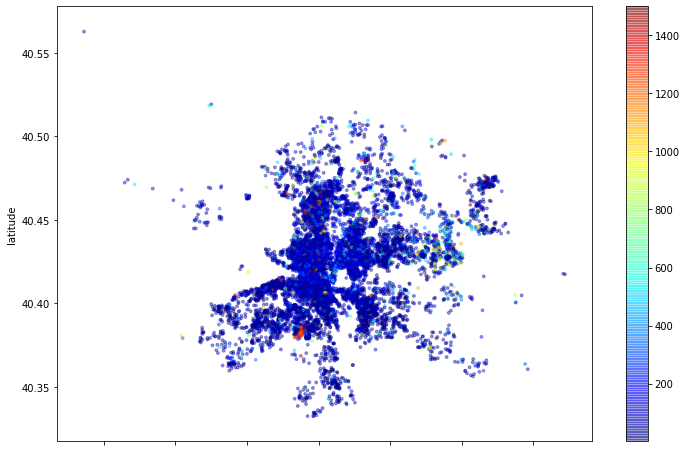

In [90]:
df_cleanm.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_cleanm['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [93]:
# ver a média da coluna `minimum_nights``
print(" O valor médio da variável Minimum_Nights do dataset de Barcelona é:")
print(df_cleanb.minimum_nights.mean())
print(" O valor médio da variável Minimum_Nights do dataset de Madri é:")
print(df_cleanm.minimum_nights.mean())

 O valor médio da variável Minimum_Nights do dataset de Barcelona é:
7.581262140758081
 O valor médio da variável Minimum_Nights do dataset de Madri é:
3.100069081219777


**VALOR ARRECADADO TOTAL**

In [96]:
print(f"O valor arrecadado total em Barcelona foi de ${df_cleanb.price.sum()}, já em Madri o valor arrecadado foi de ${df_cleanm.price.sum()}")

O valor arrecadado total em Barcelona foi de $1962045, já em Madri o valor arrecadado foi de $2313094


## Conclusões
Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

A média de preços em Madri é mais alta do que a de Barcelona, embora o a quantidade média de dias alugados em Barcelona seja o dobro de Madri, Madri ainda consegue obter um faturamento maior. 

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.